In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Dense as Dense
from tensorflow.keras.models import Model

In [ ]:
# define two sets of inputs
inputA = tf.keras.layers.Input(shape=(32,))
inputB = tf.keras.layers.Input(shape=(128,128, 3))


# the first branch operates on the first input
x = Dense(8, activation="relu")(inputA)
x = Dense(4, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)


# the second branch opreates on the second input
y = tf.keras.layers.Conv2D(128, 3)(inputB)
y = tf.keras.layers.Flatten()(y)
y = Dense(32, activation="relu")(y)
y = Dense(4, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# combine the output of the two branches
combined = tf.keras.layers.Concatenate()([x.output, y.output])
# apply a FC layer and then a regression prediction on the
# combined outputs


z = Dense(2, activation="relu")(combined)
z = Dense(1, activation="linear")(z)
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x.input, y.input], outputs=z)

In [ ]:
from keras.utils.vis_utils import plot_model

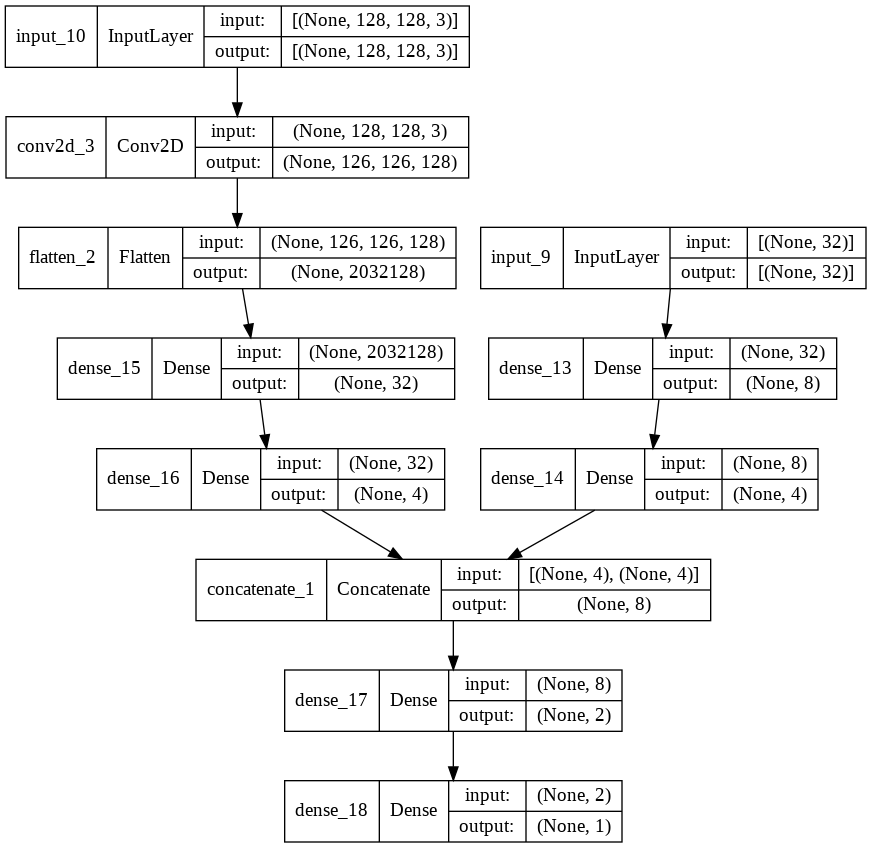

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 126, 126, 12  3584        ['input_10[0][0]']               
                                8)                                                                
                                                                                                  
 input_9 (InputLayer)           [(None, 32)]         0           []                               
                                                                                            